# Face Recognition Assignment #1

## Problem Statement 

We intend to perform face recognition. Face recognition means that for a given image
you can tell the subject id. Our database of subject is very simple. It has 40 subjects.
Below we will show the needed steps to achieve the goal of the assignment.

### Step 1: Download the dataset and understand the format 

In [5]:
from os import listdir
from PIL import Image as PImage
import matplotlib.pyplot as plt
import numpy as np

#Utility Method to loadImages into list from a given path parameter.
def loadImages(path):
    # return array of images
    foldersList = listdir(path)
    loadedImages = []
    for folder in foldersList :
        imagesList = listdir(path+folder)
        for image in imagesList:
            img = PImage.open(path +folder+'/'+ image)
            loadedImages.append(img)
    return loadedImages

In [6]:
path = "./orl_faces/"
# your images in an array
imgs = loadImages(path)

### Step 2: Generate the Data Matrix and the Label vector 

In [7]:
#converting the images list into data matrix.
dataMatrix = np.arange(4121600).reshape(400,10304)
j=0
label = []
for i in range(0,400) :
    if(i%10 == 0):
        j = j+1
    dataMatrix[i] = np.array(imgs[i]).flatten()     #flatten() method is used to unroll the matrix into vector
    label.append(j)

### Step 3: Splitting the dataset into training and test sets

In [8]:
# (50 - 50) split is used here. 
#Even instances for test set. 
#Odd instances for train set.
trainSet=np.arange(200*10304).reshape(200,10304)
testSet=np.arange(200*10304).reshape(200,10304)
trainLabel=[]
testLabel=[]
j,k=0,0
for i in range(0,400):
    if(i%2==0):
        testSet[j]=dataMatrix[i]
        testLabel.append(label[i])
        j+=1
    else:
        trainSet[k]=dataMatrix[i]
        trainLabel.append(label[i])
        k+=1

### Step 4: Classification using PCA

In [5]:
#calculate mean face of the training set.
trainMean=np.mean(trainSet,axis=0)
#subtract the mean face from the training set.
centerTrainMatrix=trainSet-trainMean
#compute the covariance matrix from obtained centered data matrix.
covMatrix=np.cov(centerTrainMatrix, rowvar=False, bias=True)

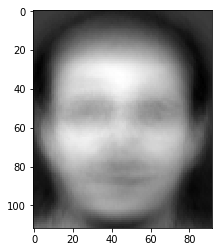

In [6]:
#displaying the mean face of the training data set.
plt.imshow(trainMean.reshape(112,92), cmap='gray');

In [7]:
#compute eigen vectors and values from obtained covariance matrix.
eigVal,eigVectMatrix=np.linalg.eigh(covMatrix)
#flip both eigen values and vectors in order to be sorted descendingly.
eigVal=np.flip(eigVal,axis=0)
eigVectMatrix=np.flip(eigVectMatrix,axis=1)

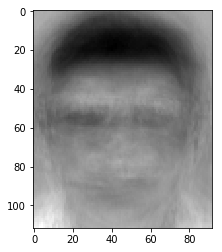

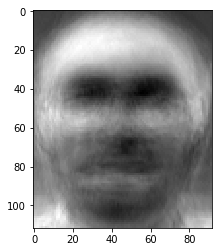

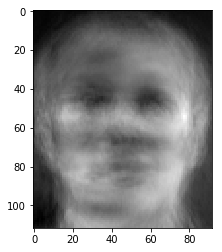

In [8]:
#displaying the largest three eigen vectors as images.
eigenFace1 = eigVectMatrix[:,0].reshape(112,92)
eigenFace2 = eigVectMatrix[:,1].reshape(112,92)
eigenFace3 = eigVectMatrix[:,2].reshape(112,92)
plt.imshow(eigenFace1, cmap='gray');
plt.figure()
plt.imshow(eigenFace2, cmap='gray');
plt.figure()
plt.imshow(eigenFace3, cmap='gray');

In [9]:
#utility method to compute the dimenison required for the specificed alpha value. 
def computeDimensionality(eigVal,threshold):
    totalDataVariance=np.sum(eigVal)
    varianceFraction,numDim,eigValSum=0,1,0
    
    while(varianceFraction<threshold):
        eigValSum+=eigVal[numDim-1]
        varianceFraction=eigValSum/totalDataVariance
        numDim+=1
    return numDim

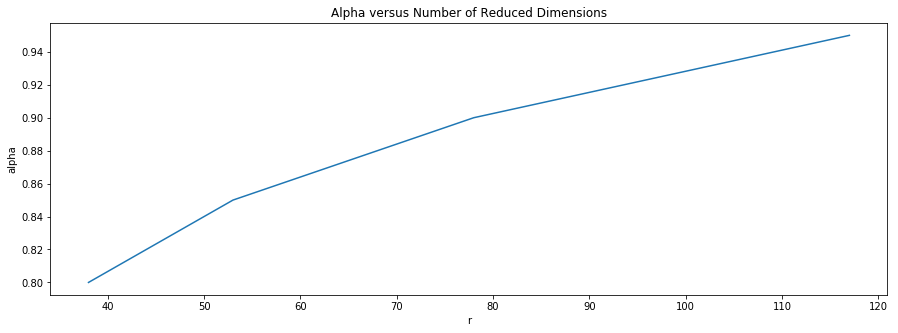

In [21]:
#Calculating dimension needed for four alpha values ( 0.8 , 0.85 , 0.9 , 0.95)
dimAlpha1=computeDimensionality(eigVal,0.8)
dimAlpha2=computeDimensionality(eigVal,0.85)
dimAlpha3=computeDimensionality(eigVal,0.9)
dimAlpha4=computeDimensionality(eigVal,0.95)
plt.plot([dimAlpha1,dimAlpha2,dimAlpha3,dimAlpha4], [0.8,0.85,0.9,0.95]);
plt.title('Alpha versus Number of Reduced Dimensions');
plt.gcf().set_size_inches(15,5);
plt.xlabel('r');
plt.ylabel('alpha');

In [17]:
#Computing the projection matrix, one for each alpha value.
projMat1=eigVectMatrix[:,0:dimAlpha1]
projMat2=eigVectMatrix[:,0:dimAlpha2]
projMat3=eigVectMatrix[:,0:dimAlpha3]
projMat4=eigVectMatrix[:,0:dimAlpha4]

In [18]:
#Projecting the tarining data instances on the new basis.
reducedDimTrain1= (projMat1.T @ centerTrainMatrix.T)
reducedDimTrain2= (projMat2.T @ centerTrainMatrix.T)
reducedDimTrain3= (projMat3.T @ centerTrainMatrix.T)
reducedDimTrain4= (projMat4.T @ centerTrainMatrix.T)

In [51]:
#calculate mean face of the test set.
testMean = np.mean(testSet,axis=0)
#subtract the mean face from the test set to obtain centered data matrix
centerTestMatrix = testSet-testMean
#Projecting the test data instances on the new basis.
reducedDimTest1=projMat1.T @ centerTestMatrix.T
reducedDimTest2=projMat2.T @ centerTestMatrix.T
reducedDimTest3=projMat3.T @ centerTestMatrix.T
reducedDimTest4=projMat4.T @ centerTestMatrix.T

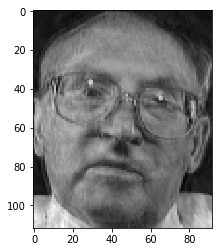

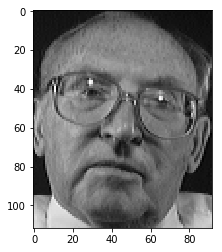

In [21]:
#Reconstruction of a face using PCA eigen vectors ,where alpha = 0.95 
reconstrutedfaces = (reducedDimTrain4.T @ projMat4.T ) + trainMean
#Comparing the reconstructed face and the original face 
plt.imshow(reconstrutedfaces[50].reshape(112,92), cmap='gray');
plt.figure()
plt.imshow(trainSet[50].reshape(112,92), cmap='gray');

In [17]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy 
from sklearn import metrics
# utility method to apply the knn classifier and return the score resulted.
def knn(trainingSet,trainingLabel,testSet,testLabel,k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainingSet,trainingLabel)
    pred=knn.predict(testSet)
    score  = metrics.accuracy_score(testLabel,pred)
    return score

In [23]:
knn(reducedDimTrain1.T,trainLabel,reducedDimTest1.T,testLabel,1)

0.945

In [24]:
knn(reducedDimTrain2.T,trainLabel,reducedDimTest2.T,testLabel,1)

0.945

In [25]:
knn(reducedDimTrain3.T,trainLabel,reducedDimTest3.T,testLabel,1)

0.945

In [26]:
knn(reducedDimTrain4.T,trainLabel,reducedDimTest4.T,testLabel,1)

0.94

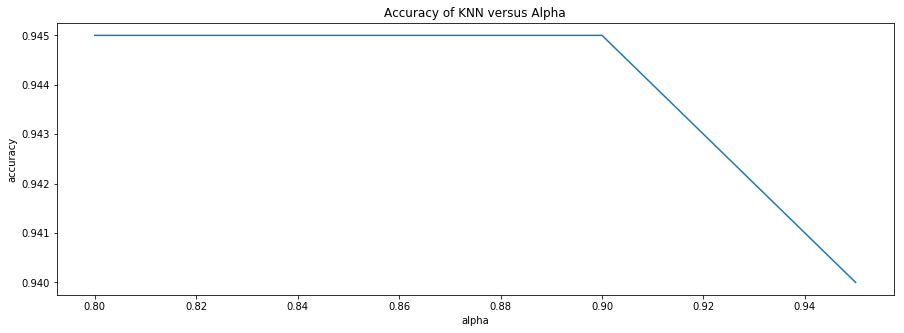

In [24]:
plt.plot([0.8,0.85,0.9,0.95],[0.945,0.945,0.945,0.94]);
plt.title('Accuracy of KNN versus Alpha');
plt.gcf().set_size_inches(15,5);
plt.xlabel('alpha');
plt.ylabel('accuracy');

### Step 5: Classification using LDA

In [6]:
#separate data into classes. Each class is stored into a matrix.
dataClassList=[]
for i in range(0,201):
    if(i%5==0 and i!=0):
        dataClassList.append(trainSet[i-5:i,:])

In [10]:
#Calculating mean for each Class Di.
classMean = np.mean(dataClassList, axis=1)

In [15]:
#Calculating the within class scatter matrix Sw.
withinClassScatterMatrix = np.zeros((10304,10304))
for i in range(0,40):
    withinClassScatterMatrix += (dataClassList[i] - classMean[i]).T @ (dataClassList[i] - classMean[i])

In [16]:
#Calculating overall sample mean. 
overallSampleMean = trainSet.mean(axis=0)

In [10]:
#Calculating between class scatter matrix Sb.
betweenClassScatterMatrix = 5 * ((classMean - overallSampleMean).T @ (classMean - overallSampleMean))

In [11]:
#getting the inverse of Sw. 
#Note that we think it is a singular matrix and that is why we used pinv.
withinClassScatterMatrixInv = np.linalg.pinv(withinClassScatterMatrix)

In [12]:
sinverse_b = withinClassScatterMatrixInv @ betweenClassScatterMatrix

In [13]:
#Computing Eigen vectors and values
eigValLDA,eigVectMatrixLDA = np.linalg.eig(sinverse_b)

In [68]:
#sorting and limtting the eigen vectors to C-1 (i.e 39) eigenvector only.
print(eigVectMatrixLDA.shape)
idx = eigValLDA.argsort()
idx = np.flip(idx, axis=0)
idx = idx[:39]
print(idx)

sortedEigVectMatrixLDA = eigVectMatrixLDA[:,idx]
sortedEigVectMatrixLDA = np.real(sortedEigVectMatrixLDA)


(10304, 10304)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 28 29 19 20 32 30 31 33 34 35 36 37 38 45]


In [ ]:
#Projecting the data in the reduced dimension subspace spanned by the 39 eigen vector.
reducedDimTrainLDA = sortedEigVectMatrixLDA.T @ trainSet.T
reducedDimTestLDA = sortedEigVectMatrixLDA.T @ testSet.T

In [ ]:
#Applying knn classifier to the reduced dimension data. 
knn(reducedDimTrainLDA.T,trainLabel,reducedDimTestLDA.T,testLabel,1)

### Step 6: Classifier Tuning 

#### First: Tuning Classifier using LDA

In [20]:
LDAscoreList = []
for k in range(1,8,2):
    LDAscoreList.append(knn(reducedDimTrainLDA.T,trainLabel,reducedDimTestLDA.T,testLabel,k))

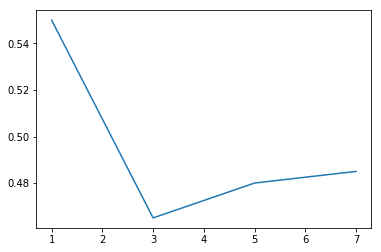

In [21]:
plt.plot([1,3,5,7],LDAscoreList);

#### Second: Tuning CLassifier using PCA

In [67]:
PCAscoreList = []
for k in range(1,8,2):
    PCAscoreList.append(knn(reducedDimTrain4.T,trainLabel,reducedDimTest4.T,testLabel,k))

NameError: name 'reducedDimTrain4' is not defined

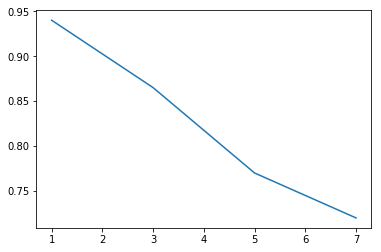

In [32]:
plt.plot([1,3,5,7],PCAscoreList);